<div class="alert alert-block alert-info">
<span style="color: rgb(0,53,91);">
<center><img src="./imagenes/ITESO_Logo.png" style="width:500px;height:142px;" title="Logo ITESO"></center>
<font face = "Times New Roman" size = "6"><b><center>Ingenierías ITESO</center></b></font>
<font face = "Times New Roman" size = "5"><b><center>Programación para Análisis de Datos</center></b></font>

<b><br><font face = "Times New Roman" size = "4"><center>Proyecto Final: Análisis Inmobiliario</center></font>
<div align="center"><font face = "Times New Roman" size = "2">José Antonio Mendoza Navarro, Francisco Aarón Ortega Anguiano, Diego Arturo Orozco Sánchez</font></div>
</span></div>

## ***Análisis Inmobiliario***

Para nuestro proyecto, decidimos enfocarnos en el análisis de bienes inmuebles que existan dentro del estado de Jalisco, sean casas o departamentos, en renta o venta. 

## *¿Como obtuvimos nuestros datos?*

Nos dimos a la tarea de desarrollar varios 'scrapers', los cuales son códigos que, de manera automática, obtienen información de las páginas de internet que les sean proporcionadas. Esto lo hicimos ya que, nosotros como equipo, traemos otro proyecto personal en el cuál necesitábamos obtener estos datos, entonces decidimos mezclar los proyectos y asi ya tener una base de datos para nuestro proyecto extraescolar. 

## *Finalidad del proyecto*

Queríamos saber la oferta que existe dentro de Jalisco en bienes inmuebles, para poder analizarlas y poder obtener conclusiones al respecto, en base a nuestros análisis. Nuestro objetivo es escalarlo a un nivel nacional eventualmente, pero empezamos de manera estatal únicamente. 

## ***Función para limpiar los archivos JSON extraídos del scraper y enumerarlos:***

In [34]:
#--------------------------------------------#
#------Función para limpiar los archivos ----#
#---------JSON extraidos del scraper --------#
#---------------y enumerarlos----------------#
#--------------------------------------------#


import os
import json


def rename_json_keys(folder_path):
    # Obtener la lista de archivos en la carpeta
    file_list = os.listdir(folder_path)

    # Recorrer cada archivo en la carpeta
    for file_name in file_list:
        file_path = os.path.join(folder_path, file_name)

        # Verificar si el archivo es un archivo JSON
        if file_name.endswith('.json'):
            # Leer el contenido del archivo JSON
            with open(file_path, 'r') as file:
                data = json.load(file)

            # Renombrar las claves de los elementos
            new_data = {}
            count = 1
            for key in data:
                new_key = str(count)
                new_data[new_key] = data[key]
                count += 1

            # Guardar el contenido actualizado en el archivo JSON
            with open(file_path, 'w') as file:
                json.dump(new_data, file, indent=4)

# Ejemplo de uso
folder_path = 'db'
rename_json_keys(folder_path)



## ***Creación de DataFrames:***

In [39]:
import pandas as pd

df_24_venta = pd.read_json('db/dataInmuebles24_casas_venta.json').transpose()
df_24_renta = pd.read_json('db/dataInmuebles24_casas_renta.json').transpose()
df_lamudi_venta = pd.read_json('db/dataLamudi_casa_for-sale.json').transpose()
df_lamudi_renta = pd.read_json('db/dataLamudi_casa_for-rent.json').transpose()

# Verificar si la columna 'url' es única en cada DataFrame y establecerla como índice
for df in [df_24_venta, df_24_renta, df_lamudi_venta, df_lamudi_renta]:
    if 'url' in df.columns and df['url'].is_unique:
        df.set_index('url', inplace=True)
    else:
        print("La columna 'url' no existe o no es única en uno de los DataFrames.")

display(df_24_venta.head())
display(df_24_renta.head())
display(df_lamudi_venta.head())
display(df_lamudi_renta.head())


,stage,latitude,longitude,realEstateType,operationType,price,createdDate,total,construido,banos,...,Escuelas Cercanas,Mascotas,Cocina integral,Acceso discapacitados,medios banos,Niveles construidos,bano,Estado de conservacion,Elevador,estacionamiento
url,,,,,,,,,,,,,,,,,,,,,
https://www.inmuebles24.com/propiedades/clasificado/veclcain-casa-en-venta-en-club-de-golf-las-lomas-diseno-moderno-142363219.html,finished,20.714664900000000,-103.436967100000000,Casa,venta,36728667,2024-01-17T18:07:44Z,807 m2,600 m2,5,...,null,null,null,null,NaN,NaN,NaN,NaN,NaN,NaN
https://www.inmuebles24.com/propiedades/clasificado/veclcain-casa-en-venta-en-el-palomar-tlajomulco-66820299.html,finished,20.591197600000000,-103.461059500000000,Casa,venta,15950000,2023-05-03T17:59:09Z,1076 m2,436 m2,4,...,NaN,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN
https://www.inmuebles24.com/propiedades/clasificado/veclcain-casa-en-venta-en-alta-california-142704449.html,finished,20.529043924300001,-103.456503152799996,Casa,venta,1800000,2024-02-14T17:29:14Z,107 m2,96 m2,NaN,...,null,NaN,null,null,NaN,2,1,Bueno,NaN,NaN
https://www.inmuebles24.com/propiedades/clasificado/veclcain-casa-en-venta-mitica-residencial-zapopan.-66832459.html,finished,20.734938899999999,-103.468696699999995,Casa,venta,24000000,2023-05-04T20:11:53Z,447 m2,650 m2,5,...,null,NaN,null,NaN,NaN,2,NaN,Excelente,NaN,NaN
https://www.inmuebles24.com/propiedades/clasificado/veclcain-casa-en-venta-en-monraz-guadalajara-143154624.html,finished,20.683606200000000,-103.403569700000000,Casa,venta,19900000,2024-04-02T15:03:39Z,556 m2,400 m2,4,...,null,NaN,null,NaN,NaN,2,NaN,Excelente,NaN,NaN


,stage,latitude,longitude,realEstateType,operationType,price,createdDate,total,construido,banos,...,M&sup2; de fondo,Acceso discapacitados,Jacuzzi,Estado de conservacion,bano,Amueblado,Chimenea,Frente a Parque,estacionamiento,Fecha disponible
url,,,,,,,,,,,,,,,,,,,,,
https://www.inmuebles24.com/propiedades/clasificado/alclcain-casa-en-renta-en-del-pilar-residencial-143277178.html,finished,20.560520100000000,-103.455150700000000,Casa,renta,19000,2024-04-16T00:24:53Z,160 m2,436 m2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
https://www.inmuebles24.com/propiedades/clasificado/alclcain-casa-en-renta-en-belissimo-habitat-residencial-143244980.html,finished,20.780228100000000,-103.463460800000000,Casa,renta,12800,2024-04-11T17:11:52Z,88 m2,120 m2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
https://www.inmuebles24.com/propiedades/clasificado/alclcain-casa-en-renta-valle-real-143066914.html,finished,20.724468500000000,-103.447205000000000,Casa,renta,59000,2024-03-21T18:17:43Z,349 m2,450 m2,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
https://www.inmuebles24.com/propiedades/clasificado/alclcain-casa-en-renta-loma-bonita-zapopan-jalisco.-143275663.html,finished,20.639249100000000,-103.400242400000000,Casa,renta,20000,2024-04-15T22:21:12Z,124 m2,205 m2,2,...,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
https://www.inmuebles24.com/propiedades/clasificado/alclcain-casa-en-renta-en-la-estancia-143363536.html,finished,20.669189000000000,-103.430061300000000,Casa,renta,48000,2024-04-24T22:12:36Z,500 m2,300 m2,5,...,NaN,null,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,title,price,recamaras,banos,construidos,longitude,latitude,operationType,realEstateType
url,,,,,,,,,
https://www.lamudi.com.mx/detalle/41032-73-b46e91de4b67-52e-9b1fe150-8658-48bb,Casa en Venta en El Tuito,"$ 3,350,000 MXN",3,2,249 m2,-105.3243258,20.3136139,venta,Casa
https://www.lamudi.com.mx/detalle/41032-73-30c10a0120c0-65bd-3a4ab2bf-ad38-4c74,Casa en Fraccionamiento en Venta en Bosques de...,"$ 34,000,000 MXN",4,5,877 m2,-103.3659489,20.7796145,venta,Casa
https://www.lamudi.com.mx/detalle/41032-73-e2c6f5e5133e-bfe8-cc06fa04-b44a-46e2,Casa en Venta en Valle Imperial,"$ 5,990,000 MXN",3,4,NaN,-103.4318986,20.7818407,venta,Casa
https://www.lamudi.com.mx/detalle/41032-73-9d5a8a29a9a4-2cdd-d227b3d9-92a3-3ebc,Casa en Venta en San Jose Del Tajo,"$ 11,500,000 MXN",4,5,358 m2,-103.448852,20.584823,venta,Casa
https://www.lamudi.com.mx/detalle/41032-73-410fa6524d2-f1fb-54b32aea-80d2-3dd0,Casa en Venta en La Romana,"$ 14,500,000 MXN",4,4,586 m2,-103.456584,20.565822,venta,Casa


,title,price,recamaras,banos,construido,realEstateType,operationType,longitude,latitude,bano
url,,,,,,,,,,
https://www.lamudi.com.mx/detalle/41032-73-147bd132ceb2-1aff-6807fe73-9162-4fd5,Casa en Renta en Santa Anita,"$ 12,500 MXN",3,2,127 m2,Casa,renta,NaN,NaN,NaN
https://www.lamudi.com.mx/detalle/41032-73-e7691671559a-915f-e843ad01-8230-42bc,Casa en Condominio en Renta en De las Juntas D...,"$ 22,000 MXN",3,2,122 m2,Casa,renta,NaN,NaN,NaN
https://www.lamudi.com.mx/detalle/41032-73-70c165db2efc-e92d-d8ae88d6-874f-4d46,Casa en Condominio en Renta en De las Juntas D...,"$ 22,000 MXN",3,2,152 m2,Casa,renta,-105.244778,20.694751,NaN
https://www.lamudi.com.mx/detalle/41032-73-5b9338152cce-d387-7072f9a2-90c5-4e28,Casa en Fraccionamiento en Renta en Parques la...,"$ 21,000 MXN",3,2,130 m2,Casa,renta,-105.2307614,20.6895909,NaN
https://www.lamudi.com.mx/detalle/41032-73-37ddb3902687-e07b-865affad-a12f-4913,Casa en Condominio en Renta en Zapopan Centro,"$ 21,000 MXN",4,3,186 m2,Casa,renta,-103.414298,20.7887597,NaN


## ***Limpieza de datos:***

In [40]:
df_24_venta = df_24_venta.dropna(subset=['longitude', 'latitude'])
df_24_renta = df_24_renta.dropna(subset=['longitude', 'latitude'])
df_lamudi_venta = df_lamudi_venta.dropna(subset=['longitude', 'latitude'])
df_lamudi_renta = df_lamudi_renta.dropna(subset=['longitude', 'latitude'])

df_24_venta.isnull().sum()
df_24_renta.isnull().sum()
df_lamudi_venta.isnull().sum()
df_lamudi_renta.isnull().sum()

title              0
price              0
recamaras          0
banos              1
construido         2
realEstateType     0
operationType      0
longitude          0
latitude           0
bano              11
dtype: int64

## ***Concatenación de los DataFrames en base a venta o renta:***

In [41]:
ventas_jalisco = pd.concat([df_24_venta, df_lamudi_venta])
rentas_jalisco = pd.concat([df_24_renta, df_lamudi_renta])

display(ventas_jalisco.head())
display(rentas_jalisco.head())


,stage,latitude,longitude,realEstateType,operationType,price,createdDate,total,construido,banos,...,Cocina integral,Acceso discapacitados,medios banos,Niveles construidos,bano,Estado de conservacion,Elevador,estacionamiento,title,construidos
url,,,,,,,,,,,,,,,,,,,,,
https://www.inmuebles24.com/propiedades/clasificado/veclcain-casa-en-venta-en-club-de-golf-las-lomas-diseno-moderno-142363219.html,finished,20.714664900000000,-103.436967100000000,Casa,venta,36728667,2024-01-17T18:07:44Z,807 m2,600 m2,5,...,null,null,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
https://www.inmuebles24.com/propiedades/clasificado/veclcain-casa-en-venta-en-el-palomar-tlajomulco-66820299.html,finished,20.591197600000000,-103.461059500000000,Casa,venta,15950000,2023-05-03T17:59:09Z,1076 m2,436 m2,4,...,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN
https://www.inmuebles24.com/propiedades/clasificado/veclcain-casa-en-venta-en-alta-california-142704449.html,finished,20.529043924300001,-103.456503152799996,Casa,venta,1800000,2024-02-14T17:29:14Z,107 m2,96 m2,NaN,...,null,null,NaN,2,1,Bueno,NaN,NaN,NaN,NaN
https://www.inmuebles24.com/propiedades/clasificado/veclcain-casa-en-venta-mitica-residencial-zapopan.-66832459.html,finished,20.734938899999999,-103.468696699999995,Casa,venta,24000000,2023-05-04T20:11:53Z,447 m2,650 m2,5,...,null,NaN,NaN,2,NaN,Excelente,NaN,NaN,NaN,NaN
https://www.inmuebles24.com/propiedades/clasificado/veclcain-casa-en-venta-en-monraz-guadalajara-143154624.html,finished,20.683606200000000,-103.403569700000000,Casa,venta,19900000,2024-04-02T15:03:39Z,556 m2,400 m2,4,...,null,NaN,NaN,2,NaN,Excelente,NaN,NaN,NaN,NaN


,stage,latitude,longitude,realEstateType,operationType,price,createdDate,total,construido,banos,...,Acceso discapacitados,Jacuzzi,Estado de conservacion,bano,Amueblado,Chimenea,Frente a Parque,estacionamiento,Fecha disponible,title
url,,,,,,,,,,,,,,,,,,,,,
https://www.inmuebles24.com/propiedades/clasificado/alclcain-casa-en-renta-en-del-pilar-residencial-143277178.html,finished,20.560520100000000,-103.455150700000000,Casa,renta,19000,2024-04-16T00:24:53Z,160 m2,436 m2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
https://www.inmuebles24.com/propiedades/clasificado/alclcain-casa-en-renta-en-belissimo-habitat-residencial-143244980.html,finished,20.780228100000000,-103.463460800000000,Casa,renta,12800,2024-04-11T17:11:52Z,88 m2,120 m2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
https://www.inmuebles24.com/propiedades/clasificado/alclcain-casa-en-renta-valle-real-143066914.html,finished,20.724468500000000,-103.447205000000000,Casa,renta,59000,2024-03-21T18:17:43Z,349 m2,450 m2,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
https://www.inmuebles24.com/propiedades/clasificado/alclcain-casa-en-renta-loma-bonita-zapopan-jalisco.-143275663.html,finished,20.639249100000000,-103.400242400000000,Casa,renta,20000,2024-04-15T22:21:12Z,124 m2,205 m2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
https://www.inmuebles24.com/propiedades/clasificado/alclcain-casa-en-renta-en-la-estancia-143363536.html,finished,20.669189000000000,-103.430061300000000,Casa,renta,48000,2024-04-24T22:12:36Z,500 m2,300 m2,5,...,null,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## ***Operaciones para la manipulación de los datos:***

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update({'font.size': 12, 'figure.figsize': (6, 4)}) 
df_venta = ventas_jalisco.copy()
df_venta.dropna(subset=['price', 'construido'], inplace=True)

# Convierte 'price' a string, limpia y transforma la columna
df_venta['price'] = df_venta['price'].astype(str).str.replace(',', '').str.extract('(\d+)')
df_venta['price'] = pd.to_numeric(df_venta['price'], errors='coerce')

# Convierte 'construido' a string, limpia y transforma la columna
df_venta['construido'] = df_venta['construido'].astype(str).str.replace('m2', '').str.strip()
df_venta['construido'] = pd.to_numeric(df_venta['construido'], errors='coerce')

# Elimina las filas con valores nulos que pueden haberse creado al convertir a números
df_venta.dropna(subset=['price', 'construido'], inplace=True)


df_renta = rentas_jalisco.copy()
df_renta.dropna(subset=['price', 'construido'], inplace=True)

# Convierte 'price' a string, limpia y transforma la columna
df_renta['price'] = df_renta['price'].astype(str).str.replace(',', '').str.extract('(\d+)')
df_renta['price'] = pd.to_numeric(df_renta['price'], errors='coerce')

# Convierte 'construido' a string, limpia y transforma la columna
df_renta['construido'] = df_renta['construido'].astype(str).str.replace('m2', '').str.strip()
df_renta['construido'] = pd.to_numeric(df_renta['construido'], errors='coerce')

# Elimina las filas con valores nulos que pueden haberse creado al convertir a números
df_renta.dropna(subset=['price', 'construido'], inplace=True)

## ***Matriz de correlación de propiedades en venta:***

<Axes: >

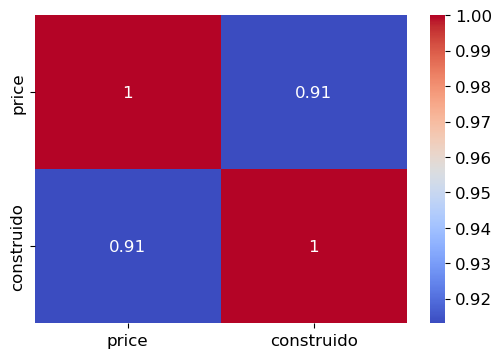

In [60]:
df_venta = df_venta[['price', 'construido']]
sns.heatmap(df_venta.corr(), annot=True, cmap='coolwarm')

## ***Matriz de correlación de propiedades en renta:***

<Axes: >

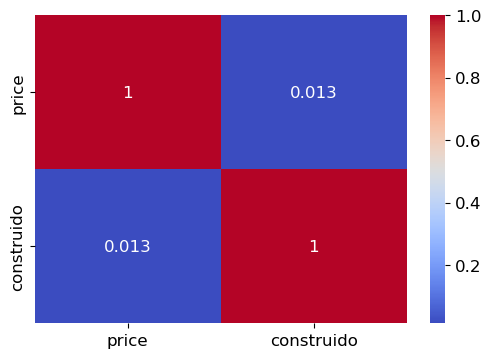

In [61]:

df_renta = df_renta[['price', 'construido']]
sns.heatmap(df_renta.corr(), annot=True, cmap='coolwarm')

## ***Gráfica de dispersión de propiedades en venta:***

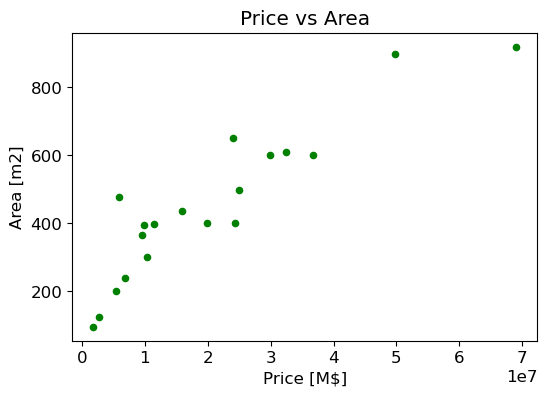

In [68]:
df_venta.plot(kind='scatter', x='price', y='construido', color = 'green')
plt.title('Price vs Area')
plt.xlabel('Price [M$]')
plt.ylabel('Area [m2]') 
plt.show();

## ***Gráfica de dispersión de propiedades en renta:***

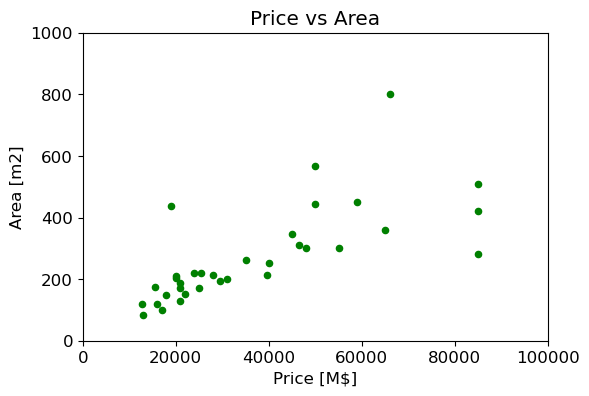

In [81]:
df_renta.plot(kind='scatter', x='price', y='construido', color = 'green')
plt.title('Price vs Area')
plt.xlabel('Price [M$]')
plt.ylabel('Area [m2]') 
plt.ylim([0, 1000])
plt.xlim([0, 100000])
plt.show();